/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.



Activated arcs: 

  Arc     Cost
(0, 13)  =  8.54400374531753
(1, 20)  =  13.0
(2, 6)  =  26.248809496813376
(3, 7)  =  19.1049731745428
(4, 5)  =  5.0
(5, 4)  =  5.0
(6, 17)  =  17.26267650163207
(7, 3)  =  19.1049731745428
(8, 9)  =  12.083045973594572
(9, 8)  =  12.083045973594572
(10, 12)  =  13.038404810405298
(11, 22)  =  9.848857801796104
(12, 10)  =  13.038404810405298
(13, 0)  =  8.54400374531753
(14, 15)  =  12.529964086141668
(15, 14)  =  12.529964086141668
(16, 23)  =  8.246211251235321
(17, 2)  =  23.0
(18, 1)  =  20.0
(19, 21)  =  15.652475842498529
(20, 18)  =  11.0
(21, 19)  =  15.652475842498529
(22, 24)  =  21.840329667841555
(23, 16)  =  8.246211251235321
(24, 11)  =  22.67156809750927

Total Cost: 353.2703993330638


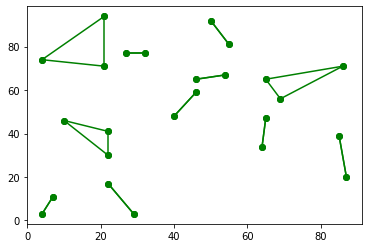

In [29]:
import numpy as np
from scipy.optimize import linprog
import random 
from matplotlib import pyplot as plt
from scipy.spatial import distance



def nn2na(NN):
  idx = np.argwhere(NN)
  NA = np.zeros([NN.shape[0], idx.shape[0]]).astype(int)
  for i, arc in enumerate(idx):
    NA[arc[0], i] = 1
    NA[arc[1], i] = -1

  arc_idx = [ (arc[0], arc[1]) for arc in idx]
  return NA, arc_idx

#initialize the random
random.seed(a=2)

#generating the data Node-Node matrix
Nodes = 25
NN = np.ones(shape=(Nodes,Nodes), dtype=np.int8)
np.fill_diagonal(NN,0)


#creating random nodes
coord = []
for i in range(Nodes):
    for j in range(2):
        if i != j:
           x = random.randint(0,100)
           y = random.randint(0,100)
           coord.append((x,y))

#creating costs as the distance of 2 points.
C = []
for i in range(Nodes):
   for j in range(Nodes):
      if i != j:
         C.append(distance.euclidean(coord[i], coord[j])) 
        

#formulation of LP
NA, arcs = nn2na(NN)
Aeq1 = np.where(NA == 1, 1, 0)
Aeq2 = np.where(NA == -1, 1, 0)
Aeq = np.concatenate((Aeq1, Aeq2), axis=0)
beq = np.zeros(Nodes*2)
beq.fill(1)
bounds = tuple([(0, None) for arc in range(0, Aeq.shape[1])])



#optimization
result = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds, method='revised simplex')


#printing the solution
Active = []
for k in range(Nodes):
    temp = list(result.x[(Nodes-1)*k:(Nodes-1)*(k+1)])
    temp.insert(k, 0.0)
    Active.append(temp)


print("\nActivated arcs: ")
print("\n  Arc     Cost")
for i in range(len(result.x)):
    if result.x[i] != 0:
        print(arcs[i], " = ", C[i])

print("\nTotal Cost:", result.fun)

for i in range(Nodes):
    for j in range(Nodes):
        if Active[i][j] == 1:
            x = [coord[i][0], coord[j][0]]
            y = [coord[i][1], coord[j][1]]
            plt.plot(x, y, 'go-')
plt.show()

#as it can be seen the resolution generates different subtours thous the given method couldn't find a
#single path that connects each of the nodes. To solve this we could implement Dantzig's restrictions,
#or go for a metaheuristic algorithm such as GRASP or Genetic algorithms.